In [1]:
!apt-get install poppler-utils
#if you're running on mac, run 'brew install poppler' in your own terminal

/bin/sh: apt-get: command not found


In [2]:
!pip install pdf2image
!pip install easyocr
!pip install spacy
!pip install pdf-info


You should consider upgrading via the '/Users/cwolfe/workspace/prospectus-parser/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/cwolfe/workspace/prospectus-parser/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/cwolfe/workspace/prospectus-parser/venv/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/Users/cwolfe/workspace/prospectus-parser/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
import easyocr
import numpy as np
import PIL
import spacy

from spacy import displacy
from PIL import ImageDraw
from IPython.display import display, Image
from pdf2image import convert_from_path


In [5]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


converting
converted


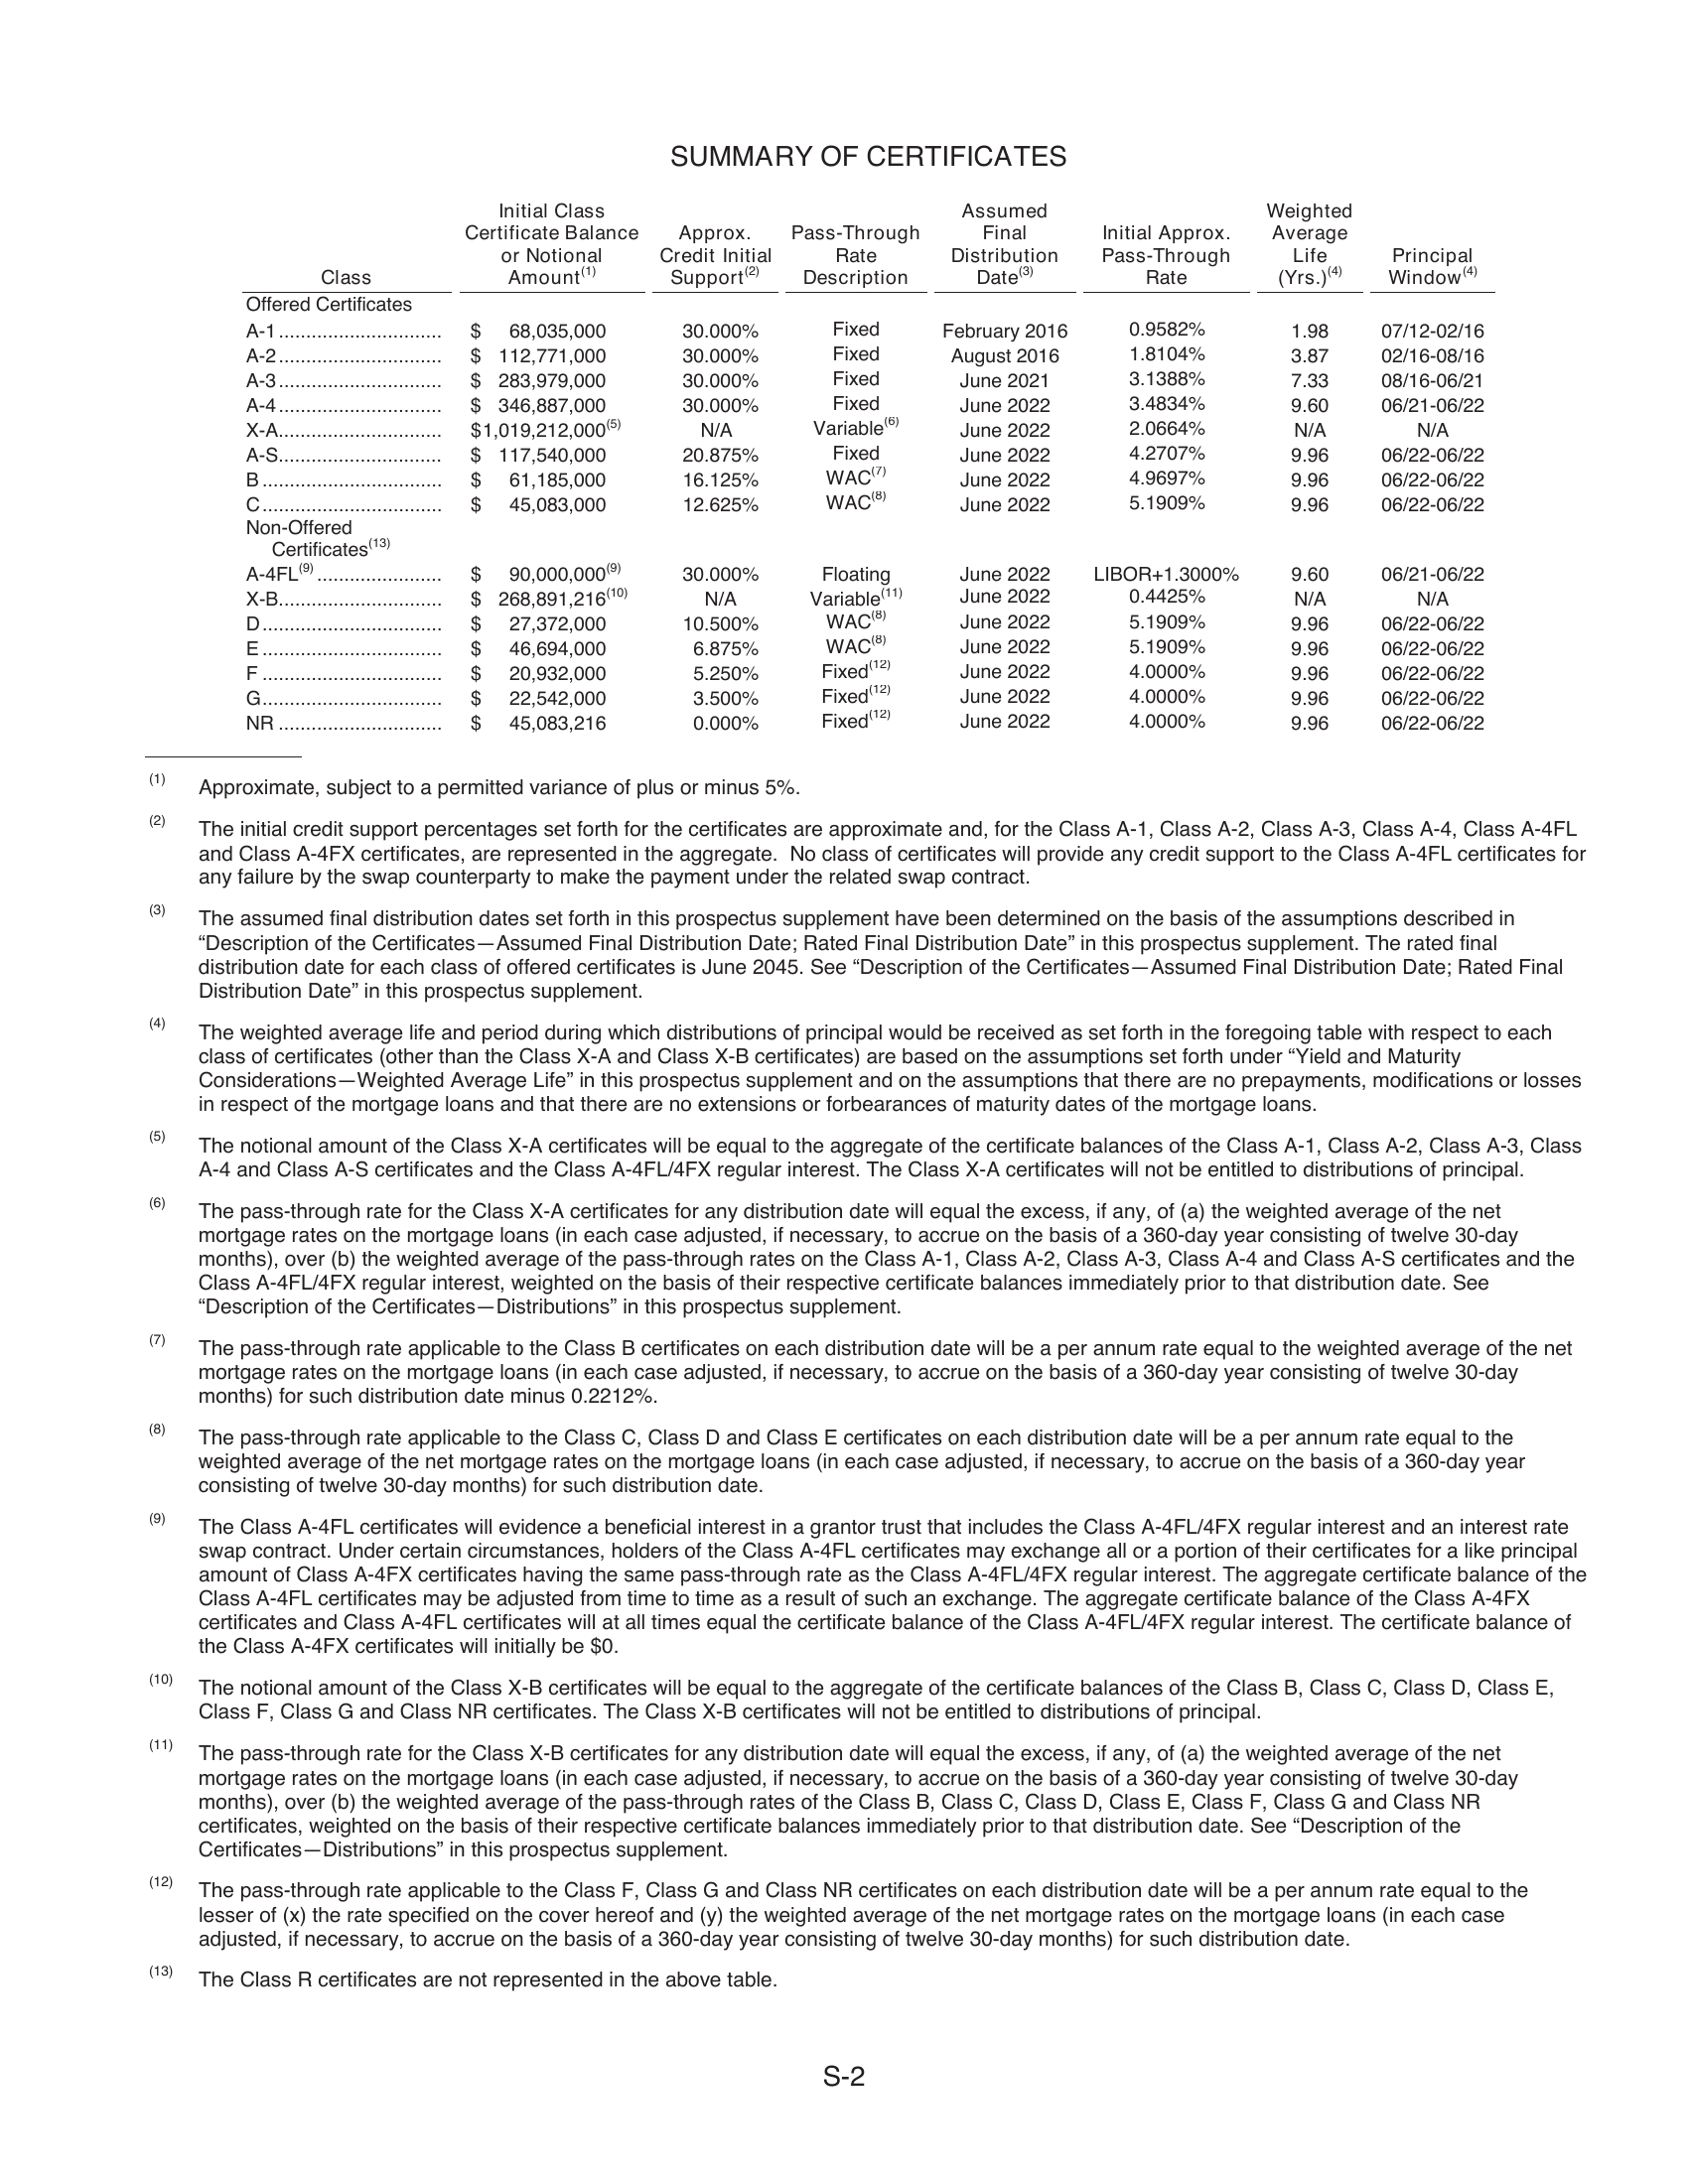

In [8]:
reader = easyocr.Reader(['en'])
    
print('converting')    

# see the documents folder for other prospectuses
images = convert_from_path('./documents/JPC_2012CIBX_PSUP.pdf')

print('converted')

display(images[2])

In [9]:
bounds = reader.readtext(np.array(images[2]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[674, 141], [1080, 141], [1080, 174], [674, 174]],
  'SUMMARY OF CERTIFICATES',
  0.7480984773585944),
 ([[498, 200], [612, 200], [612, 224], [498, 224]],
  'Initial Class',
  0.9042824590727953),
 ([[966, 200], [1058, 200], [1058, 224], [966, 224]],
  'Assumed',
  0.9332796123698271),
 ([[1274, 200], [1366, 200], [1366, 226], [1274, 226]],
  'Weighted',
  0.9999949002259438),
 ([[464, 222], [648, 222], [648, 246], [464, 246]],
  'Certificate Balance',
  0.8385738785710652),
 ([[682, 224], [756, 224], [756, 248], [682, 248]],
  'Approx:',
  0.7366273868398534),
 ([[794, 222], [930, 222], [930, 248], [794, 248]],
  'Pass-Through',
  0.9999045012591822),
 ([[986, 222], [1038, 222], [1038, 246], [986, 246]],
  'Final',
  0.9994406838071757),
 ([[1108, 222], [1238, 222], [1238, 248], [1108, 248]],
  'Initial Approx',
  0.9867598588325983),
 ([[1277, 221], [1362, 221], [1362, 249], [1277, 249]],
  'Average',
  0.9999979724399027),
 ([[502, 242], [610, 242], [610, 270], [502, 270]],
  'or

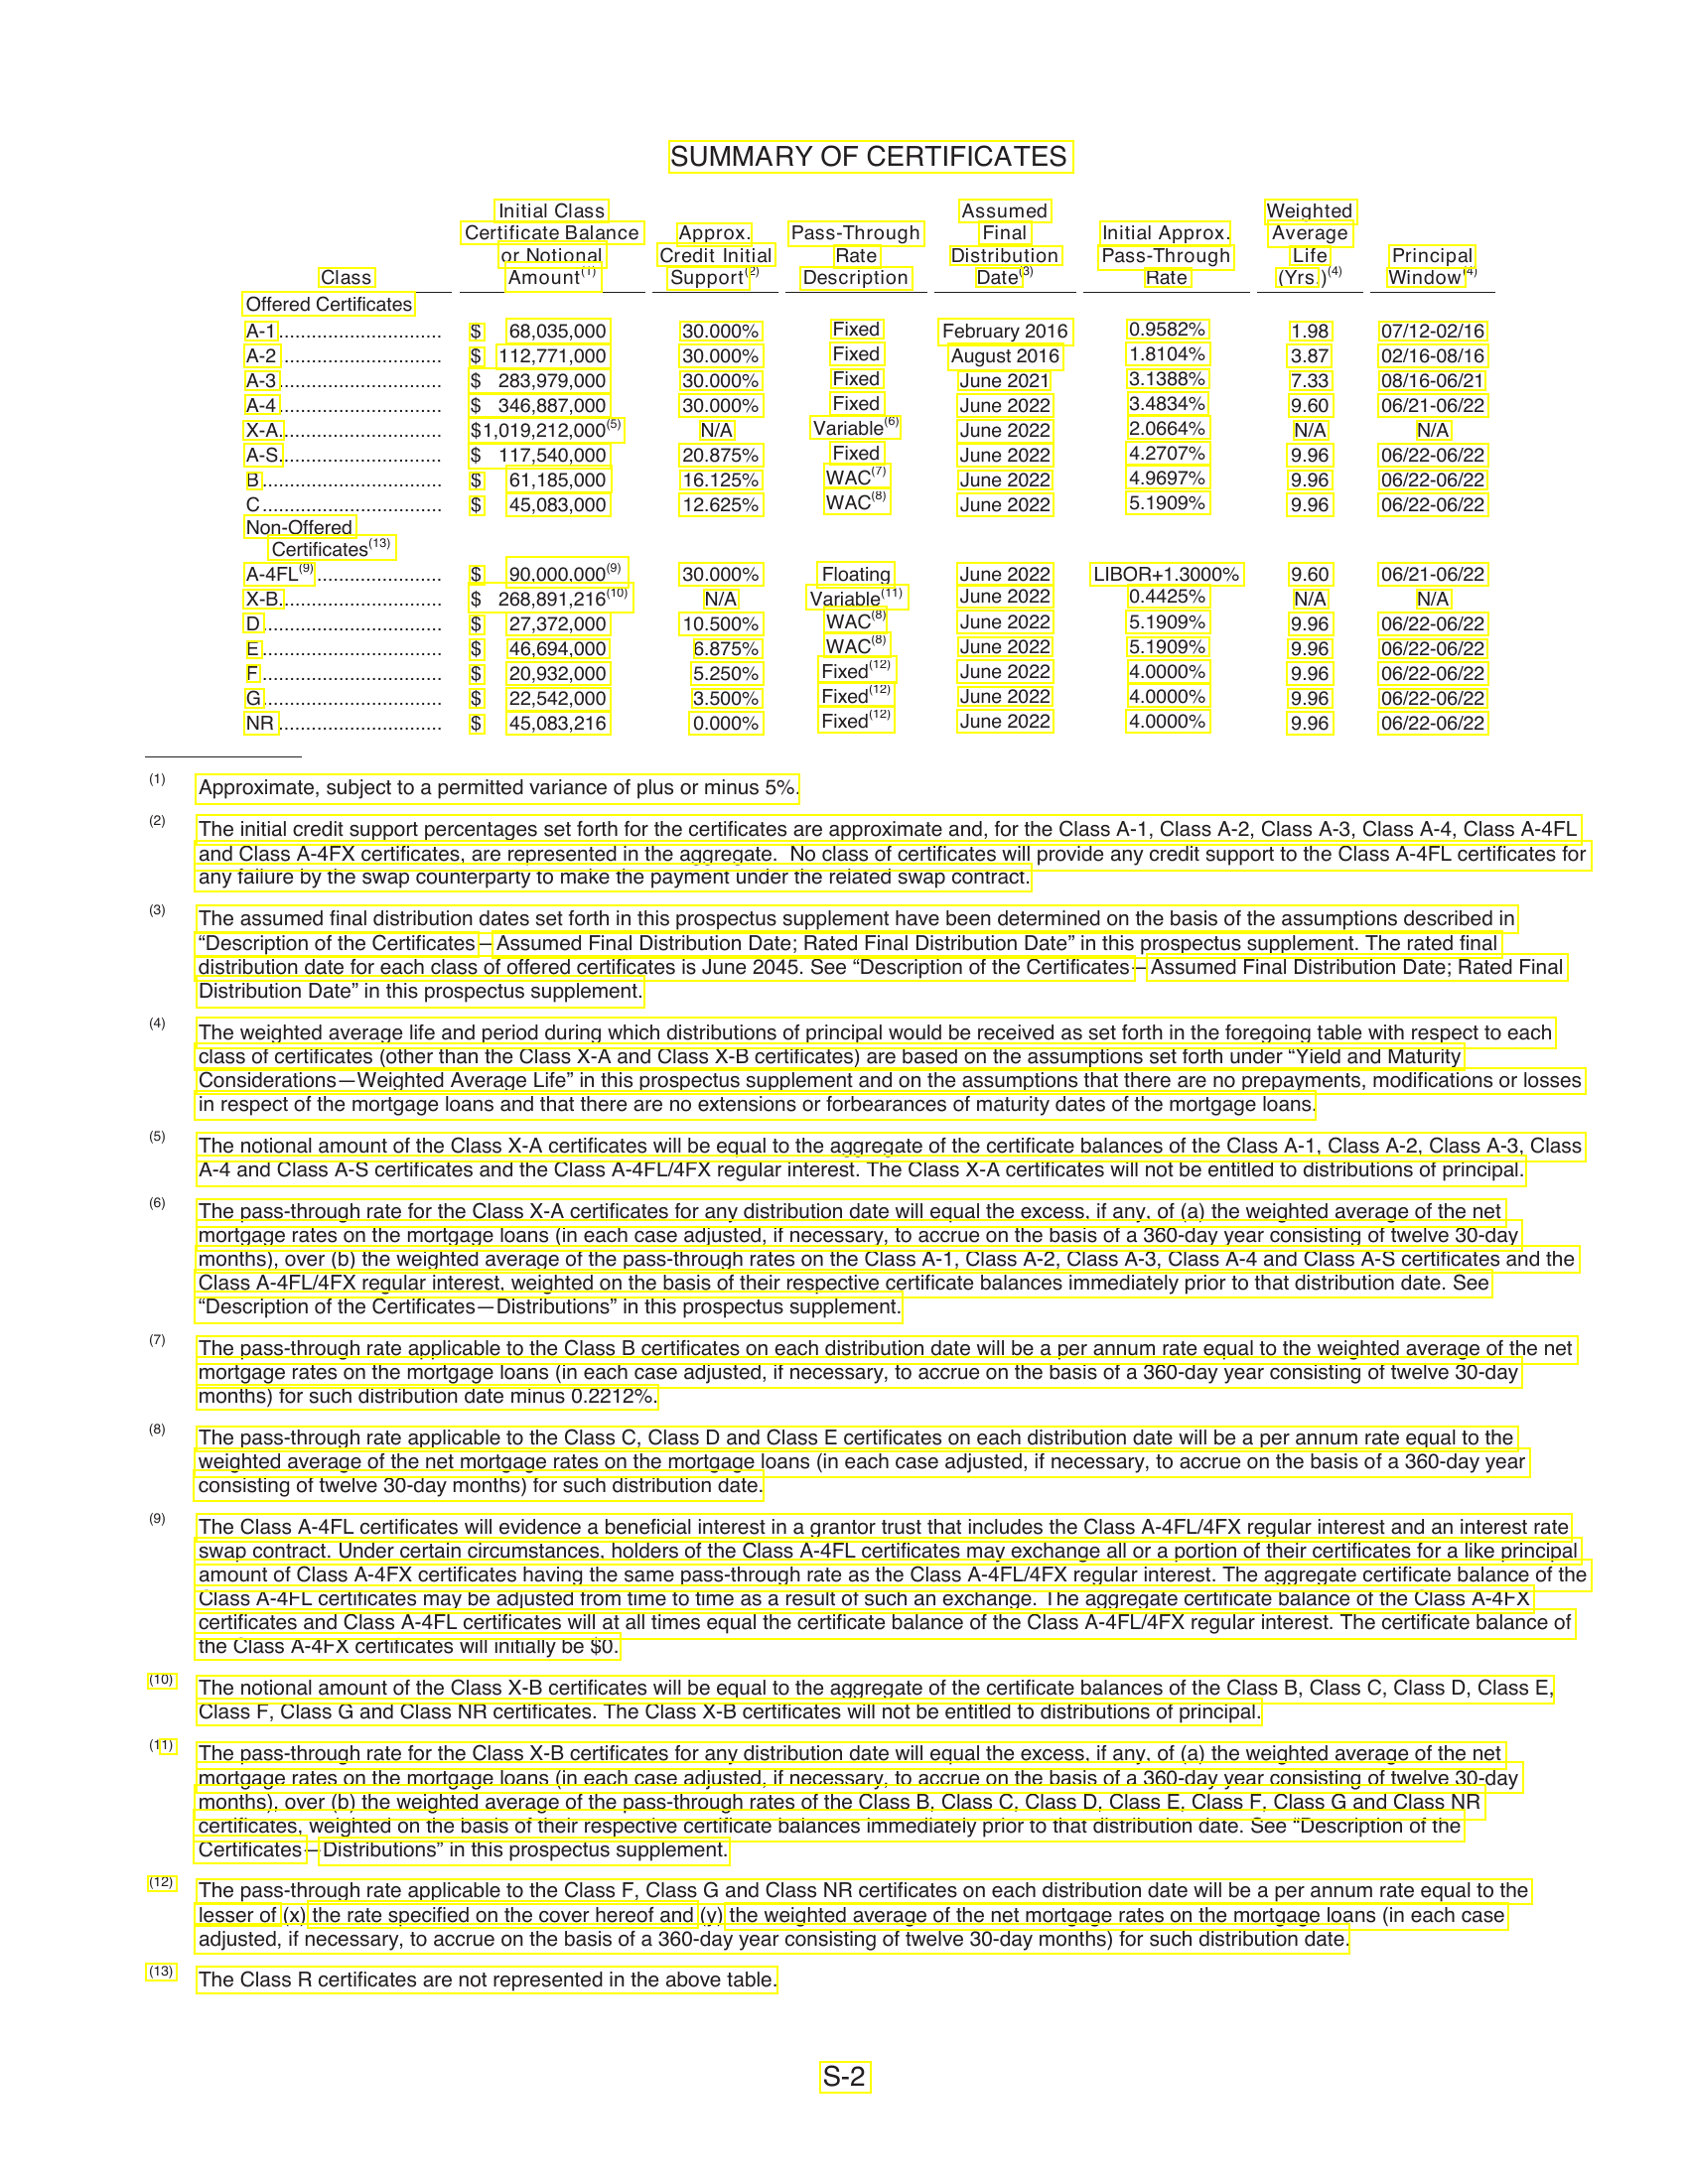

In [10]:
draw_boxes(images[2], bounds)

In [11]:
bounds[1][1]

'Initial Class'

In [12]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

SUMMARY OF CERTIFICATES
Initial Class
Assumed
Weighted
Certificate Balance
Approx:
Pass-Through
Final
Initial Approx
Average
or Notional
Credit Initial
Rate
Distribution
Pass-Through
Life
Principal
Class
Amount )
Support'
Description
Date
Rate
(Yrs
Window
Offered Certificates
A-1
S
68,035,000
30.000%
Fixed
February 2016
0.9582%
1.98
07/12-02/16
A-2
S
112,771,000
30.000%
Fixed
August 2016
1.8104%
3.87
02/16-08/16
A-3
S   283,979,000
30.000%
Fixed
June 2021
3.1388%
7.33
08/16-06/21
A-4
S   346,887,000
30.000%
Fixed
June 2022
3.4834%
9.60
06/21-06/22
X-A.
S1,019,212,000(5)
NIA
Variable(6)
June 2022
2.0664%
NIA
NIA
A-S_
S   117,540,000
20.875%
Fixed
June 2022
4.2707%
9.96
06/22-06/22
B
S
61,185,000
16.125%
WAC()
June 2022
4.96979
9.96
06/22-06/22
$
45,083,000
12.625%
WAC(8)
June 2022
5.1909%
9.96
06/22-06/22
Non-Offered
Certificates(13)
A-4FL (9)
$
90,000,000(9)
30.000%
Floating
June 2022
LIBOR+1.3o0O%
9.60
06/21-06/22
X-B.
$  268,891,216/10)
NIA
Variable(11)
June 2022
0.4425%
NIA
NIA
D
$


In [19]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(text)


displacy.render(nlp(doc.text),style='ent', jupyter=True)